# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observations:
-As we would expect, temperatures becomes significantly warmer as one approaches the equator and much cooler as one moves away from the equator.

-There is not a strong relationship between latitude and cloudiness, but it is interesting to note the groupings of cities around a cloudiness of 0, 20%, 40%, 80% and 100%; especially in the Northern Hemisphere

-There is not a strong relationship between latitude and windspeed. Interesting to note that the selected cities have a windspeed <40mph and the major clusters are below 20mph.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

575

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

url = base_url + weather_api_key

city_data = []
print("Beginning Data Retrieval")
print("-----------------------------")

record_count = 1
set_count = 1

for index, city in enumerate(cities):
    if (index%50==0 and index>=50):
        record_count = 1 
        set_count = set_count + 1
        
    query_url = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city)) 
    record_count = record_count + 1
    
    try: 
        city_weather = requests.get(query_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass 
        
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | skibbereen
Processing Record 3 of Set 1 | port moresby
Processing Record 4 of Set 1 | george
Processing Record 5 of Set 1 | taveta
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | beaverlodge
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | salalah
Processing Record 14 of Set 1 | trogir
Processing Record 15 of Set 1 | ossora
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | sobolevo
Processing Record 18 of Set 1 | otradnoye
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | koulamoutou
Processing Record 21 of Set 1 | suixi
Processing Record 22 of Set 1 | malkangiri
Processing R

Processing Record 41 of Set 4 | ambilobe
Processing Record 42 of Set 4 | port hedland
Processing Record 43 of Set 4 | komsomolskiy
Processing Record 44 of Set 4 | tuy hoa
Processing Record 45 of Set 4 | provideniya
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | bengkulu
Processing Record 48 of Set 4 | grajau
Processing Record 49 of Set 4 | klaksvik
Processing Record 50 of Set 4 | cidreira
Processing Record 1 of Set 5 | santa fe
Processing Record 2 of Set 5 | port macquarie
Processing Record 3 of Set 5 | ribeira grande
Processing Record 4 of Set 5 | batu gajah
Processing Record 5 of Set 5 | vavuniya
Processing Record 6 of Set 5 | sojitra
Processing Record 7 of Set 5 | katsuura
Processing Record 8 of Set 5 | ponta do sol
Processing Record 9 of Set 5 | roebourne
Processing Record 10 of Set 5 | krasnokamensk
Processing Record 11 of Set 5 | fortuna foothills
Processing Record 12 of Set 5 | chuy
Processing Record 13 of Set 5 | ahuiman

Processing Record 33 of Set 8 | puerto del rosario
Processing Record 34 of Set 8 | flin flon
Processing Record 35 of Set 8 | los llanos de aridane
Processing Record 36 of Set 8 | zeerust
Processing Record 37 of Set 8 | newport
Processing Record 38 of Set 8 | zhangjiakou
Processing Record 39 of Set 8 | airai
Processing Record 40 of Set 8 | tirano
Processing Record 41 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 42 of Set 8 | kununurra
Processing Record 43 of Set 8 | verkhnevilyuysk
Processing Record 44 of Set 8 | oistins
Processing Record 45 of Set 8 | gao
Processing Record 46 of Set 8 | kupang
Processing Record 47 of Set 8 | stornoway
Processing Record 48 of Set 8 | qaqortoq
Processing Record 49 of Set 8 | srednekolymsk
Processing Record 50 of Set 8 | great falls
Processing Record 1 of Set 9 | tolaga bay
Processing Record 2 of Set 9 | laguna
Processing Record 3 of Set 9 | guozhen
Processing Record 4 of Set 9 | saint anthony
Processing Record 5 of Set 9 | severo-kur

Processing Record 21 of Set 12 | buraydah
Processing Record 22 of Set 12 | brazzaville
Processing Record 23 of Set 12 | khani
Processing Record 24 of Set 12 | presque isle
Processing Record 25 of Set 12 | byron bay
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
city_weather

{'coord': {'lon': 153.62, 'lat': -28.65},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 68.43,
  'feels_like': 61.56,
  'temp_min': 66.2,
  'temp_max': 70,
  'pressure': 1016,
  'humidity': 48},
 'visibility': 10000,
 'wind': {'speed': 11.41, 'deg': 180},
 'clouds': {'all': 0},
 'dt': 1596688902,
 'sys': {'type': 1,
  'id': 9496,
  'country': 'AU',
  'sunrise': 1596659108,
  'sunset': 1596698262},
 'timezone': 36000,
 'id': 2172880,
 'name': 'Byron Bay',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
city_data_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,albany,42.60,-73.97,87.01,35,15,4.41,US,1596225799
1,1,verkh-usugli,52.70,115.17,59.32,98,100,1.12,RU,1596225857
2,2,chokurdakh,70.63,147.92,46.89,73,100,2.98,RU,1596225857
3,3,port elizabeth,-33.92,25.57,51.01,88,0,5.41,ZA,1596225758
4,4,kapaa,22.08,-159.32,81.00,74,90,17.22,US,1596225857


In [14]:
len(city_data_df)

606

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
print(city_data_df['City'].where(city_data_df['Humidity'] > 100))

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
601    NaN
602    NaN
603    NaN
604    NaN
605    NaN
Name: City, Length: 606, dtype: object


In [16]:
#  Get the indices of cities that have humidity over 100%.
city_data_df.agg({'Humidity':['mean', 'median', 'var', 'std', 'max', 'min']})

,Humidity
mean,70.262376
median,77.000000
var,455.337656
std,21.338642
max,100.000000
min,3.000000


In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data_df[~city_data_df["Humidity"] >100] 

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [18]:
# Extract relevant fields from the data frame
city_data_df = city_data_df[~city_data_df["Humidity"] >100] 

# Export the City_Data into a csv
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv("city_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

(0.0, 120.0)

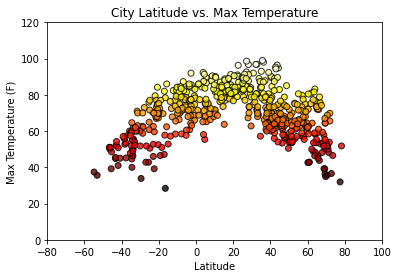

In [19]:
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"], c=city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='hot', alpha=0.8, label="City")

plt.title('City Latitude vs. Max Temperature')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim([-80, 100])
plt.ylim([0, 120])


## Latitude vs. Humidity Plot

(0.0, 120.0)

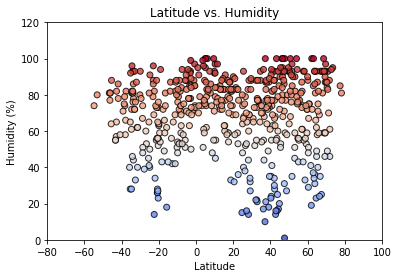

In [20]:
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"], c=city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='coolwarm', alpha=0.8, label="City")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity')
plt.xlim([-80, 100])
plt.ylim([0, 120])

## Latitude vs. Cloudiness Plot

(0.0, 120.0)

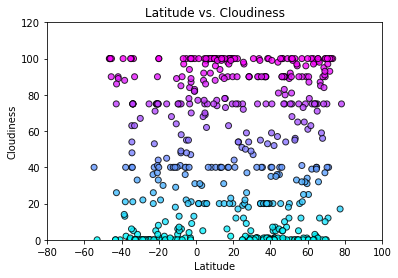

In [21]:
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"], c=city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='cool', alpha=0.8, label="City")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.xlim([-80, 100])
plt.ylim([0, 120])

## Latitude vs. Wind Speed Plot

(0.0, 120.0)

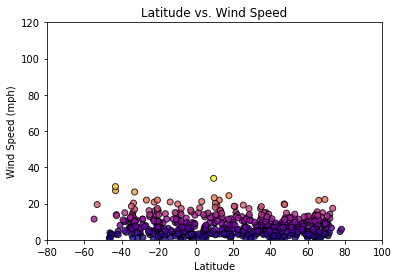

In [22]:
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], c=city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed')
plt.xlim([-80, 100])
plt.ylim([0, 120])

## Linear Regression

In [23]:
# Create Northern (>0) and Southern Hemisphere (<0) DataFrames
nothern = city_data_df.loc[city_data_df['Lat'] >= 0.0]
nothern.reset_index(inplace=True)

southern = city_data_df.loc[city_data_df['Lat'] < 0.0]
southern.reset_index(inplace=True)

In [24]:
#Create a function to create Linear Regression plots
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue}")
 
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=20,color="black")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.600395981784929


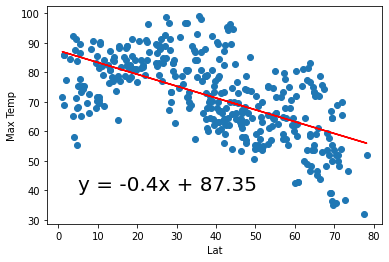

In [25]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (5,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7111215561468153


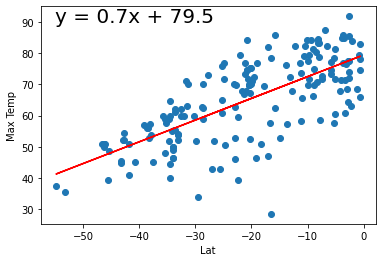

In [26]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.07857267919518886


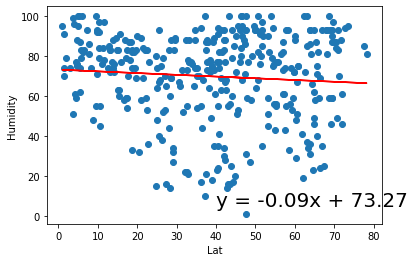

In [27]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (40,5)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10390832193718512


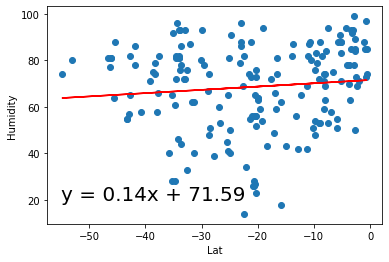

In [29]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,20)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.10764730769549985


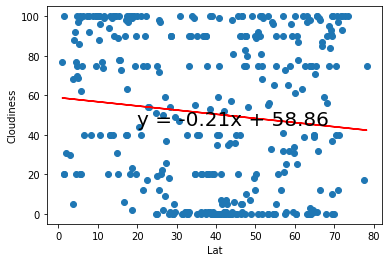

In [30]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,45)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.042095943865938755


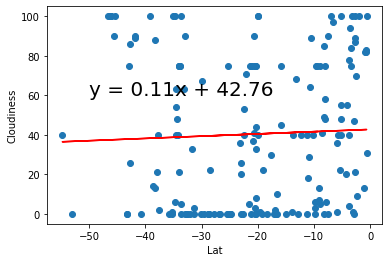

In [31]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-50,60)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.11652851680693387


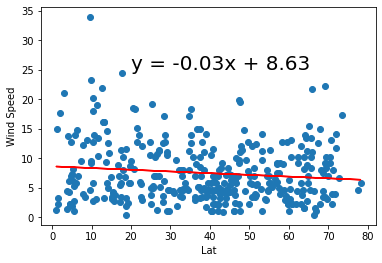

In [32]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (20,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1780003617339213


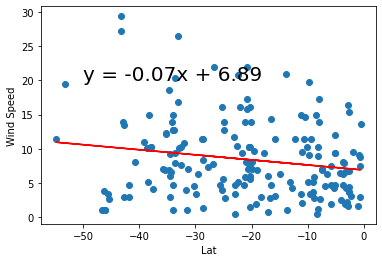

In [33]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-50,20)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos)